# Introduction to Convolutional Neural Networks

Let's learn another neural network type, the convolutional neural network.

## What we will accomplish

In this notebook we will:
- Introduce the idea behind convolutional neural networks:
    - Briefly touch on the math behind them,
- Show how to build a convolutional neural network in `keras` using the MNIST data and
- End by pointing you in the direction of additional resources that where you can take the next steps.

In [9]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

## The idea behind a convolutional neural network

Convolutional neural networks were developed to work with grid based data sets. This is particularly useful for classification problems involving images, which have a natural grid structure where each grid point is a pixel.

The basic idea underlying a convolutional neural network is "What if we paid attention to small portions of an image instead of looking at all of the image at once?". Essentially the convovlutional net pays attention to local features of the data as opposed to a feed forward net that pays attention to the global features. Let's see how this is done with some images.

##### How feed forward networks examine data

A feed forward network works by taking a weighted sum of the values in every single pixel, i.e. it looks at the entire image all at once. For example, consider this image of a 5.

<img src="lecture_12_assets/conv_5_0.png" width="40%"></img>

This image would be handeled by the feed forward net by taking a weighted sum of all of its pixels.

##### How convolutional neural networks examine data

In contrast a convolutional neural network hones in on smaller portions of the image, by sliding a small square grid along the image and only focusing on what is enclosed in the small grid. Here are examples of three such square grids usinig that same image of a 5.

<img src="lecture_12_assets/conv_5_1.png" width="50%"></img>

<img src="lecture_12_assets/conv_5_2.png" width="50%"></img>

<img src="lecture_12_assets/conv_5_3.png" width="50%"></img>

As we will soon see, this sliding is actually a series of weighted sums whose results themselves get stored in a grid.

## The three parts of a convolutional neural network

A convolutional neural network has three parts. We will break these parts down one at a time.

### Part 1 - the convolutional layers

Each image above is a visual representation of how a convolutional neural network processes the raw image data (possibly preprocessed) into the first layer of the network. More formally, what's happening is a series of weighted sums of the values found in each grid point. Rather than provide a notationally dense formula for these sums, I will give an example. A reference with a more formal write up of these sums is provided at the end.

Suppose that our image is a $10\times10$ grid represented by this 2D array

<img src="lecture_12_assets/samp_array.png" width="40%">

A $3\times 3$ grid is then slid around this array. Here's one such example with some randomly chosen weights to demonstrate what's going on. This is a standard size for the square grid (also called a <i>filter</i>) another common size is $5\times 5$. 

There are $8 \times 8$ possible grid locations for a $3\times 3$ grid over a $10\times 10$ grid. In general if your grid is $L \times B$ grid points and your filter is $F \times F$ then there are $(L - F + 1 )\times (B - F + 1)$ potential positions.

<img src="lecture_12_assets/conv_filter_1.png" width="60%"></img>

With this filter over the green highlighted grid points we "focus" on this square of the image with a dot product between the two arrays, aka we multiply matching numbers then add them all up:

$$
\begin{array}{c l c l c l}
& 9 \times 224 & + & 9 \times 186 & + & 5 \times 220 \\
+ & 2 \times 242 & + & 10 \times 8 & + & 8 \times 74 \\
+ & 0 \times 87 & + & 3 \times 1 & + & 1 \times 108\end{array}
$$
$$
= 6057.
$$

The outputs of these $8 \times 8$ dot products are then stored in their own $8 \times 8$ grid which makes up the first hidden layer of the network. Returning to our example we would have a hidden layer with $6057$ as the $1,2$ entry of the hidden layer:

<img src="lecture_12_assets/conv_hidden_1.png" width="60%"></img>

<i>In a real convolutional neural net our hidden layer would have $3$ dimensions the first two representing the $(L - F + 1) \times (B - F + 1)$ grid, and the third indicating that we do this sliding grid process multiple times. The output from each sliding grid process is stored in the depth of the network. For example if you did the sliding grid process $16$ times the dimensions of the hidden layer would be $(L - F + 1) \times (B - F + 1) \times 16$.</i>

Similar to a feed forward network, an activation function is then applied to each value in the hidden layer, the ReLU function is the usual choice.

Here is a summary picture of the first convolutional layer.

<img src="lecture_12_assets/conv_layer_summ.png" width="60%"></img>


#### Padding and different stride values

You may notice that the sliding grid process pays less attention to the borders of your image than the inside of the image. To prevent loss around the borders it is common to add padding cells around the outside of your input grids, these are extra rows and columns consisting of all $0$s. 

You can also choose different <i>stride</i> values for the sliding grid. The convolutional layers stride value is how many grid points you slide to the right and down. For example, above we used a stride value of $1$, but you can choose any strid value you'd like.  Note that a stride value of $1$ is pretty typical.

### Part 2 - the pooling layers

Once you have set up a couple of convolutional layers, it has become common practice to add in what are known as pooling layers. These layers shrink the size of our grids in order to downsample our observations, and shrink the number of parameters needed to fit the model.

Pooling layers work by sliding a square grid over each grid in the convolutional layer, taking the maximum value captured in the square. The convolutional layer's grid size is shrunken by sliding the pooling square around with a stride value larger than $1$. The most common pooling square size is $2\times 2$ with a stride value of $2$.

To make this clear we'll work through an example of a made up convolution layer with dimension $8\times 8\times 2$.

Consider this pooling transition:

<img src="lecture_12_assets/conv_pool_1.png" style="width:100%"></img>

The pooling layer was created by placing $2 \times 2$ squares and finding the maximum values in each covered grid area found by striding the square every $2$ spaces. Like so:

<img src = "lecture_12_assets/conv_pool_2.png" style="width:100%"></img>

You can choose alternative pooling operations like taking the average of the entries in the square or even the Euclidean norm of those entries (both have been done in the past), but max pooling has become most common since it has been found to perform better in practice. Also note that you can use different pooling grid sizes and strides, but $2 \times 2$ and a stride of $2$ are the most common choices.

Note that pooling hidden layers have the same depth as their input layer, this is in contrast to convolutional neural nets which may have a larger depth than their input layer.

### Part 3 - the fully connected layer

After building a number of alternating convolutional and pooling layers you end the network with a fully connected layer, the layers we have dealt with in the prior notebooks.

In this way we can somehow think of the convolutional and pooling layers of the network as a kind of data preprocessing step for a dense neural network.

Prior to going to the fully connected layer, we will flatten (make into a single column vector) the hidden layer. Note this is one of the main reasons we pool in earlier layers, if we did not do pooling, the number of parameters we would have to fit in the fully connected layers would be huge.

## Building a convolutional neural network in `keras` with the MNIST data set

We will now build our first convolutional net in `keras` returning to our trusty MNIST data set.

In [10]:
## This imports datasets stored in keras
from keras.datasets import mnist

In [11]:
## Here we load the data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

## Still need to scale
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
# NEW to CONV nets
## We need to reshape our data to be the correct dimensions for
## the net
## observations, grid, colorvalues
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
## Make validation data
## First make the validation set
from sklearn.model_selection import train_test_split

X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train,
                                                          test_size=.2,
                                                          shuffle=True,
                                                          stratify=y_train,
                                                          random_state=440)

We will first import all of the `keras` classes and functions we need.

In [16]:
## Importing the things
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

from keras.utils import to_categorical
# for newer versions of keras run this instead
# from keras.utils.np_utils import to_categorical
# or look up the documentation for your version

##### 1. Make an empty model object

In [17]:
## We've seen this before
model = models.Sequential()

##### 2. Add convolutional and pooling layers

In [18]:
## adding our first convolutional layer

## Conv2D(32, specifies that we want a convolutional layer with depth 32
## (3,3) is our sliding grid size
## We're using the relu activation function
## and our images are a gray scale value for 28X28 pixels, hence the input_shape
model.add( layers.Conv2D( 32, (3,3), activation='relu', input_shape=(28,28,1,)  ) )


## adding our first Max Pooling layer
## MaxPooling2D((2,2) tells python we want to add
## a max pooling layer that uses a (2,2) square grid
## strides = 2, sets the stride value to 2
model.add( layers.MaxPooling2D( (2,2), strides = 2 ) )


## Add another layer, alternating between conv and pool
model.add( layers.Conv2D(64, (3,3), activation='relu'))
model.add( layers.MaxPooling2D( (2,2), strides=2) )



In [19]:
## Let's examine the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
## Now we'll add the fully connected layer

## .Flatten() will flatten the data for us,
## meaning the last output data will turn into 
## a vector
model.add( layers.Flatten() )

## We've seen these before
## Then we add a single dense hidden layer
## This is 64 nodes high
model.add(layers.Dense(64, activation='relu'))


## Finally an output layer
model.add(layers.Dense(10, activation='softmax'))

In [21]:
## Look at the network summary now
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

##### 3. Compile the network

In [22]:
## We've seen this before in the last notebook
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### 4. Fit the model on the training data

In [23]:
## we'll go for 10 epochs
## This is slow!
epochs=10
history = model.fit(X_train_train, 
                      to_categorical(y_train_train), 
                      epochs=epochs, 
                      batch_size=512,
                      validation_data=(X_val,to_categorical(y_val)))

Epoch 1/10
94/94 [==============================] - 4s 39ms/step - loss: 0.5283 - accuracy: 0.8419 - val_loss: 0.1834 - val_accuracy: 0.9442
Epoch 2/10
94/94 [==============================] - 4s 42ms/step - loss: 0.1305 - accuracy: 0.9606 - val_loss: 0.0922 - val_accuracy: 0.9715
Epoch 3/10
94/94 [==============================] - 4s 39ms/step - loss: 0.0819 - accuracy: 0.9750 - val_loss: 0.0688 - val_accuracy: 0.9791
Epoch 4/10
94/94 [==============================] - 4s 38ms/step - loss: 0.0605 - accuracy: 0.9817 - val_loss: 0.0571 - val_accuracy: 0.9818
Epoch 5/10
94/94 [==============================] - 4s 38ms/step - loss: 0.0483 - accuracy: 0.9856 - val_loss: 0.0564 - val_accuracy: 0.9818
Epoch 6/10
94/94 [==============================] - 4s 38ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0537 - val_accuracy: 0.9827
Epoch 7/10
94/94 [==============================] - 4s 38ms/step - loss: 0.0319 - accuracy: 0.9902 - val_loss: 0.0414 - val_accuracy: 0.9863
Epoch 8/10
94

In [24]:
history_dict = history.history

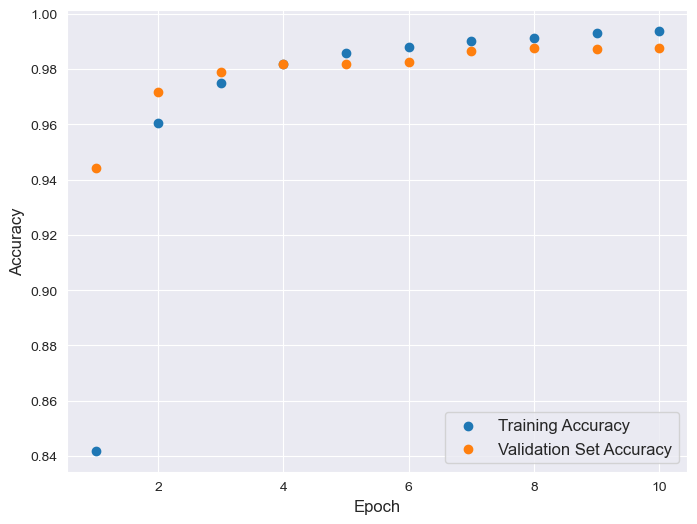

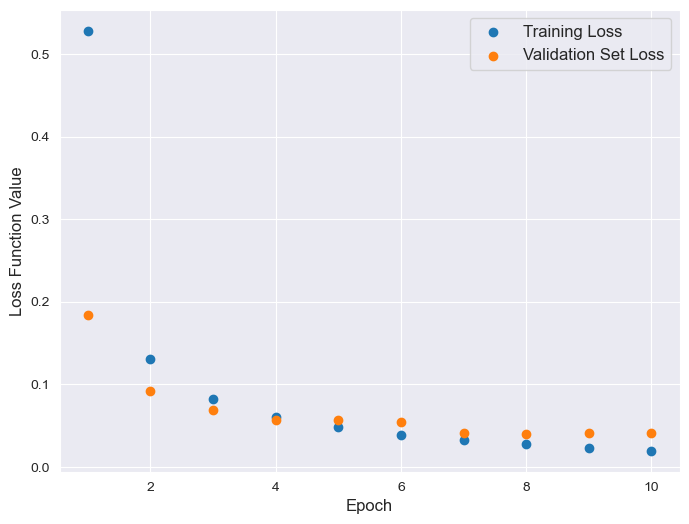

In [25]:
plt.figure(figsize = (8,6))

plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()


plt.figure(figsize = (8,6))

plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss Function Value", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

#### Adding some padding

In the previous network we did not add any padding. Let's compare it to a network where we do add in padding outside our images. Luckily `keras` will do this for us.

In [26]:
model2 = models.Sequential()

## if you include the argument padding='same'
## keras will add the padding for you :)
model2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), padding='same'))
model2.add(layers.MaxPooling2D((2,2), strides=2))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2), strides=2) )

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [28]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history2 = model2.fit(X_train_train, 
                      to_categorical(y_train_train), 
                      epochs=epochs, 
                      batch_size=512,
                      validation_data=(X_val,to_categorical(y_val)))

Epoch 1/10
94/94 [==============================] - 5s 48ms/step - loss: 0.5096 - accuracy: 0.8478 - val_loss: 0.1532 - val_accuracy: 0.9552
Epoch 2/10
94/94 [==============================] - 4s 47ms/step - loss: 0.1203 - accuracy: 0.9638 - val_loss: 0.1003 - val_accuracy: 0.9712
Epoch 3/10
94/94 [==============================] - 4s 46ms/step - loss: 0.0761 - accuracy: 0.9768 - val_loss: 0.0840 - val_accuracy: 0.9719
Epoch 4/10
94/94 [==============================] - 5s 50ms/step - loss: 0.0543 - accuracy: 0.9826 - val_loss: 0.0799 - val_accuracy: 0.9731
Epoch 5/10
94/94 [==============================] - 4s 47ms/step - loss: 0.0427 - accuracy: 0.9869 - val_loss: 0.0597 - val_accuracy: 0.9818
Epoch 6/10
94/94 [==============================] - 4s 47ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0574 - val_accuracy: 0.9823
Epoch 7/10
94/94 [==============================] - 4s 46ms/step - loss: 0.0295 - accuracy: 0.9912 - val_loss: 0.0412 - val_accuracy: 0.9863
Epoch 8/10
94

In [30]:
history_dict2 = history2.history

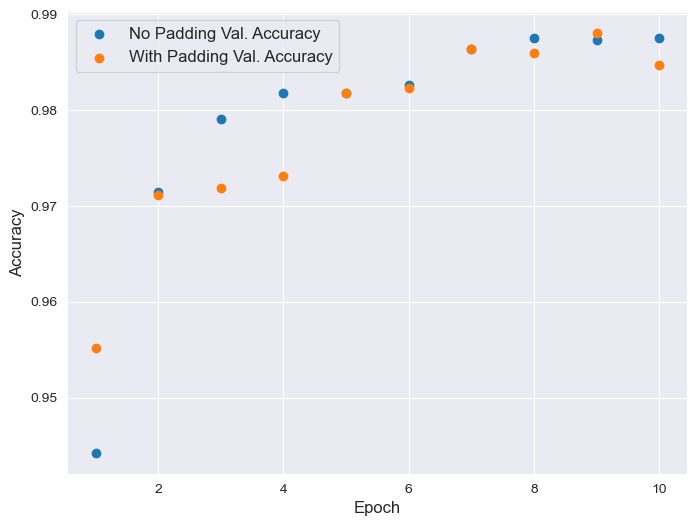

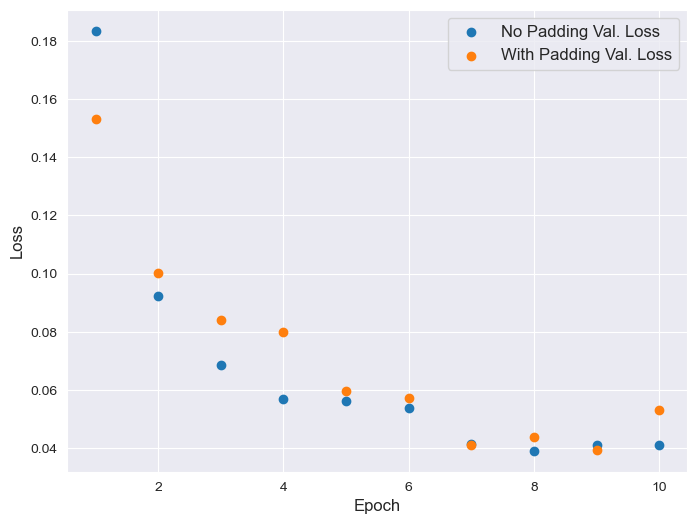

In [31]:
plt.figure(figsize = (8,6))

plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "No Padding Val. Accuracy")
plt.scatter(range(1,epochs+1), history_dict2['val_accuracy'], label = "With Padding Val. Accuracy")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

plt.figure(figsize = (8,6))

plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "No Padding Val. Loss")
plt.scatter(range(1,epochs+1), history_dict2['val_loss'], label = "With Padding Val. Loss")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12)

plt.show()

When you finally have a network architecture that you are happy with you can get predictions on the test set just like we did in the previous notebook.

##### A Quick Note

While we have only used these networks for grayscale images, they can also be used on color images. The only difference is that instead of a $28 \times 28 \times 1$ array we'd have a $28 \times 28 \times 3$ array, where the depth of $3$ gives you values for RGB scales.


## References

While there are many more steps you can take when building a convolutional neural network it's left up to you to explore more. Two good resources can be found here:

- <a href="https://github.com/letspython3x/Books/blob/master/Deep%20Learning%20with%20Python.pdf">Deep Learning with Python</a>, which is a practical guide on how to implement neural networks with `keras`
- <a href="https://link.springer.com/book/10.1007/978-3-319-94463-0">Neural Networks and Deep Learning</a>, which is a textbook that builds up the theory of neural networks. Convolutional neural networks start in chapter 8.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)